In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [299]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [300]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [ ]:
# add extra 1 column for x to easy calclation with beta
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [302]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [303]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [304]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [305]:
# initializing beta values, learning rate and number of iterations
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [-1.42451862  2.07777311  1.8703628  -0.50291064 -1.66314758  0.7652958
 -1.08025806  1.54215359]


#### Parameter optimization

In [306]:

cost_history = []
def logistic_gradient_descent(X, Y, lr,beta):
    for i in range(n_iter):
        """
        Z = beta.T.X = beta0 + beta1.x1
        Y_hat = sigmoid(Z)
        """
        z = X.dot(beta)
        y_hat = sigmoid(z)

        gradient = compute_gradients(X, Y, y_hat)

        beta = beta - lr * gradient

        cost = compute_cost(y_hat, Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")
        
    return beta

In [ ]:
#gettng update beta value
beta = logistic_gradient_descent(X, Y, lr,beta)

Iteration : 0: Beta : [-1.42644148  2.07514006  1.86923495 -0.49963801 -1.66118638  0.76431798
 -1.0791206   1.54084356] :Cost : 1.6300
Iteration : 100: Beta : [-1.60519084  1.81830402  1.75159213 -0.18659144 -1.47126302  0.66624057
 -0.96634213  1.41341236] :Cost : 1.3452
Iteration : 200: Beta : [-1.75843718  1.57672278  1.62784943  0.09932808 -1.29282743  0.56573648
 -0.85587923  1.29397473] :Cost : 1.0974
Iteration : 300: Beta : [-1.88823876  1.35309731  1.5039626   0.35940918 -1.12575392  0.46269913
 -0.74871061  1.18330605] :Cost : 0.8849
Iteration : 400: Beta : [-1.99607537  1.14961439  1.3856615   0.59370481 -0.97211335  0.36031648
 -0.64634446  1.08233342] :Cost : 0.7078
Iteration : 500: Beta : [-2.0830212   0.96821512  1.27735422  0.80134298 -0.83602068  0.26385289
 -0.55112164  0.9920323 ] :Cost : 0.5669
Iteration : 600: Beta : [-2.15091624  0.80999159  1.18137595  0.98221579 -0.72150822  0.17823021
 -0.46593598  0.91264951] :Cost : 0.4609
Iteration : 700: Beta : [-2.20302268

#### Cost Visualization

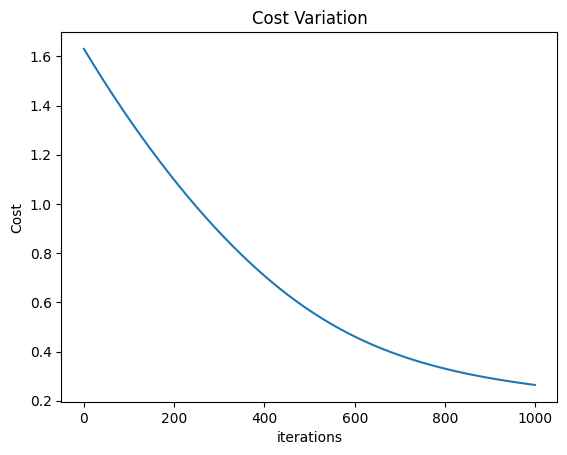

In [308]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Predict Probability

In [309]:
def predict_proba(X, beta):
    z = X.dot(beta)
    Y_proba = sigmoid(z)
    return Y_proba

In [310]:
Y_proba = predict_proba(X, beta)
Y_proba

array([0.31691015, 0.31237908, 0.45070252, 0.04444029, 0.4857152 ,
       0.59208737, 0.02553908, 0.1289989 , 0.01224339, 0.5304592 ,
       0.07773093, 0.02260662, 0.01064574, 0.03784013, 0.38268436,
       0.01332908, 0.89180788, 0.00290158, 0.12222804, 0.19198506,
       0.03915936, 0.01573094, 0.00168953, 0.56399437, 0.83445853,
       0.1813413 , 0.01454602, 0.01988049, 0.14270595, 0.00214461,
       0.7069427 , 0.02511467, 0.04560238, 0.09440441, 0.12663394,
       0.2550347 , 0.00352097, 0.00954778, 0.02845868, 0.04222507,
       0.0053805 , 0.27595336, 0.04187114, 0.19733496, 0.08340392,
       0.08385492, 0.14867878, 0.08911367, 0.02252263, 0.01136978,
       0.21523859, 0.09474663, 0.03312022, 0.14164344, 0.23580801,
       0.72352796, 0.53713249, 0.496747  , 0.29846877, 0.14908431,
       0.00507555, 0.01736112, 0.00266489, 0.45357894, 0.21870797,
       0.04922191, 0.22868653, 0.14983318, 0.46625632, 0.08463958,
       0.01949361, 0.51420073])

####  Binary class predictions

In [311]:
threshold = 0.7

In [312]:
def predict_class(X, beta, threshold):
    z = X.dot(beta)
    Y_predicted = sigmoid(z)
    return Y_predicted >= threshold

In [313]:
predict_class(X,beta,threshold)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

#### Evaluation Matrics

##### Conusion Matrix

In [314]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [315]:
Y_hat = predict_class(X,beta,threshold)

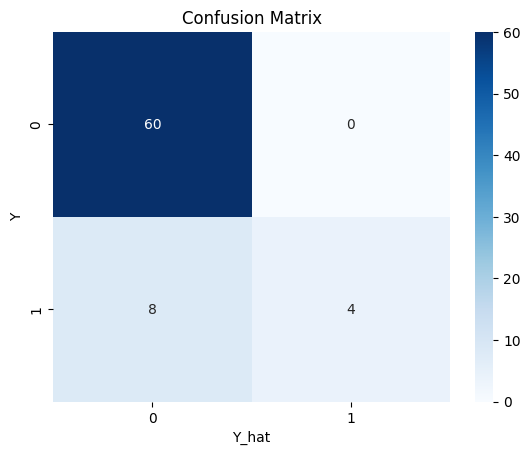

In [316]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

##### Precisiom, Recall, f1score, accuracy

In [317]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [318]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 1.0
Recall : 0.3333333333333333
F1 Score : 0.5
Accuracy : 0.8888888888888888


In [319]:
# initializing empty arrays for store each precision and recall values for precision recall curve
Precision= []
Recall = []

##### ROC curve

In [320]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)

        if (TP + FP) == 0:
            precision = 0 
        else:
            precision = TP / (TP + FP)

        recall = TP / (TP +FN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        Precision.append(precision)
        Recall.append(recall)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)

In [321]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

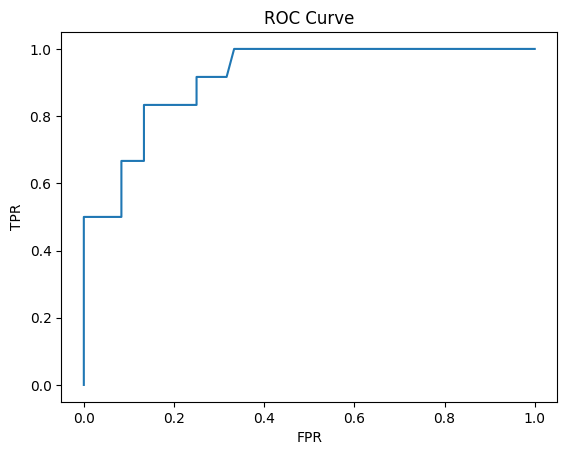

In [322]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [323]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9159722222222223


####  Precision Recall Curve 

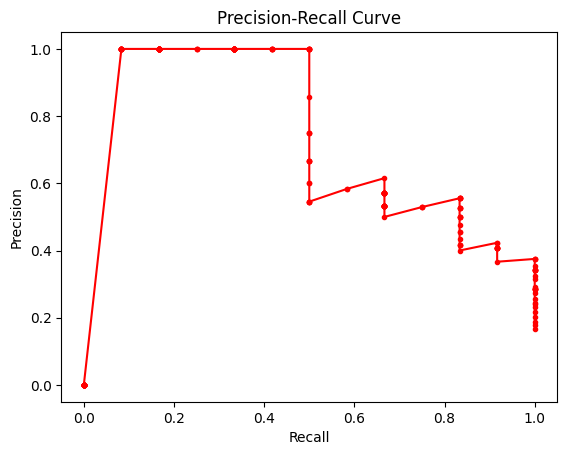

In [324]:
plt.plot(Recall, Precision, color='red',marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
